In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

sns.set()
np.set_printoptions(suppress=True)
tf.__version__

'2.3.0'

In [2]:
trainingData = pd.read_csv('source/MSFT_TRAIN.csv') # Training data
testData = pd.read_csv('source/MSFT_TEST.csv') # Test data

### Creating the data structure for the training set

In [3]:
scaler = MinMaxScaler()

In [4]:
days = 2 # Number of days to predict the next day

In [5]:
trainingSet = trainingData.iloc[:,1:2].values
trainingSet = scaler.fit_transform(trainingSet)

In [6]:
xTrain = []
yTrain = []

for i in range(days, trainingSet.shape[0]):
    xTrain.append(trainingSet[i-days:i, 0])
    yTrain.append(trainingSet[i, 0])

xTrain, yTrain = np.array(xTrain), np.array(yTrain)

In [7]:
xTrain = np.reshape(xTrain, (xTrain.shape[0], xTrain.shape[1], 1))

#### Creating the data structure for the test set

In [8]:
total = pd.concat((trainingData['Open'], testData['Open']), axis=0)
inputs = total[len(total) - len(testData) - days:].values
inputs = scaler.transform(inputs.reshape(-1, 1))

In [9]:
xTest = []
yTest = []

for i in range(days, days + 20):
    xTest.append(inputs[i-days:i, 0])
    yTest.append(inputs[i, 0])

xTest, yTest = np.array(xTest), np.array(yTest)
xTest = np.reshape(xTest, (xTest.shape[0], xTest.shape[1], 1))

#### Creating the NN

In [10]:
model = tf.keras.models.Sequential()

In [11]:
units = 50
dropout = 0.25

In [12]:
model.add(tf.keras.layers.LSTM(units=units, return_sequences=True, input_shape=(xTrain.shape[1], 1)))
model.add(tf.keras.layers.Dropout(dropout))

model.add(tf.keras.layers.LSTM(units=units, return_sequences=True))
model.add(tf.keras.layers.Dropout(dropout))

model.add(tf.keras.layers.LSTM(units=units))
model.add(tf.keras.layers.Dropout(dropout))

model.add(tf.keras.layers.Dense(units=1))

In [13]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x=xTrain, y=yTrain, epochs=100, batch_size=32, validation_data=(xTest, yTest), callbacks=[
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=3,
        verbose=2,
        mode='min',
        restore_best_weights=True)])

Epoch 1/100
84/84 [==============================] - 2s 20ms/step - loss: 0.0312 - val_loss: 0.0025
Epoch 2/100
84/84 [==============================] - 0s 4ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 3/100
84/84 [==============================] - 0s 4ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 4/100
84/84 [==============================] - 0s 4ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 5/100
84/84 [==============================] - 0s 4ms/step - loss: 0.0013 - val_loss: 0.0016
Epoch 6/100
84/84 [==============================] - 0s 4ms/step - loss: 0.0013 - val_loss: 0.0033
Epoch 7/100
84/84 [==============================] - 0s 4ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 8/100
84/84 [==============================] - 0s 4ms/step - loss: 0.0011 - val_loss: 0.0014
Epoch 9/100
84/84 [==============================] - 0s 4ms/step - loss: 0.0011 - val_loss: 0.0038
Epoch 10/100
84/84 [==============================] - 0s 4ms/step - loss: 0.0010 - val_loss: 0.0016
Epoch 00

In [14]:
prediction = model.predict(xTest)
prediction = scaler.inverse_transform(prediction)
yTest = scaler.inverse_transform(yTest.reshape(-1, 1))

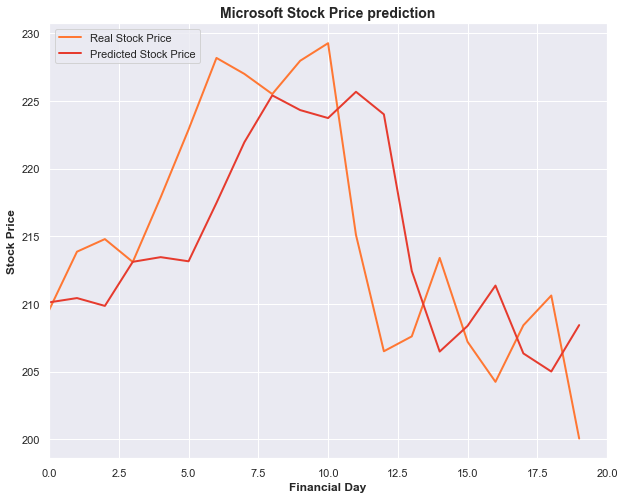

In [15]:
plt.figure(figsize=(10, 8))

plt.plot(yTest, color='#FF7733', label = 'Real Stock Price', linewidth=2)
plt.plot(prediction, color="#E63B2E", label = 'Predicted Stock Price', linewidth = 2)

plt.title('Microsoft Stock Price prediction', fontsize = 14, fontweight = 'bold')
plt.xlabel('Financial Day', fontsize = 12, fontweight = 'bold')
plt.xlim(left=int(0), right=int(20))
plt.ylabel('Stock Price', fontsize = 12, fontweight = 'bold')
plt.legend(loc='upper left')

plt.show()
